In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("AnalysisData/SpreadsheetData/PlaytestingAnalysis_102124.csv") as f:
   df = pd.read_csv(f)

In [3]:
# actual usable data starts at row 25
df.iloc[25:]

,Timestamp,SessionID,Most Common State,Respawns at C1,Respawns at C2,Respawns at C3,Respawns at C4,Respawns at C5
25,10/20/2024 21:11:00,6.386506e+17,STATE_LARGE,0,0.0,0.0,0.0,0.0
26,10/20/2024 21:25:44,6.386506e+17,STATE_LARGE,0,0.0,0.0,0.0,0.0
27,10/20/2024 21:30:12,6.386506e+17,STATE_LARGE,0,0.0,0.0,3.0,5.0
28,10/20/2024 21:52:01,6.386506e+17,STATE_LARGE,3,5.0,0.0,0.0,0.0


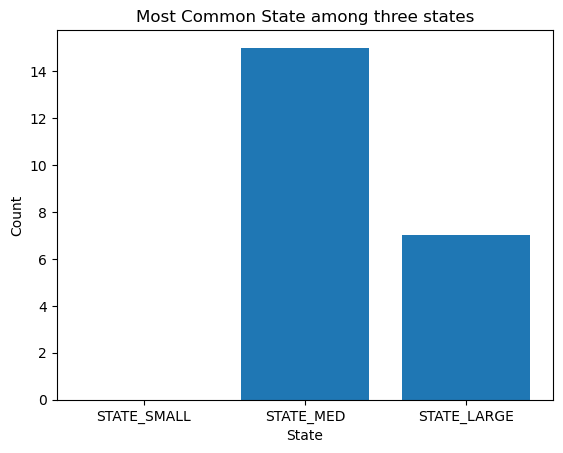

In [4]:
# bar graph of Most Common State among three states: STATE_SMALL, STATE_MED, STATE_LARGE, from row 25
# first, we need to count the states manually
# then, we can plot the data

# count the states
state_counts = {}
for state in ['STATE_SMALL', 'STATE_MED', 'STATE_LARGE']:
    state_counts[state] = df[df['Most Common State'] == state].shape[0]

# plot the data using the state_counts dictionary
plt.bar(state_counts.keys(), state_counts.values())
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Most Common State among three states')
plt.savefig("AnalysisData/Graphs/Bar/PlaytestingAnalysis_102124_MostCommonState.png")
# plt.show()

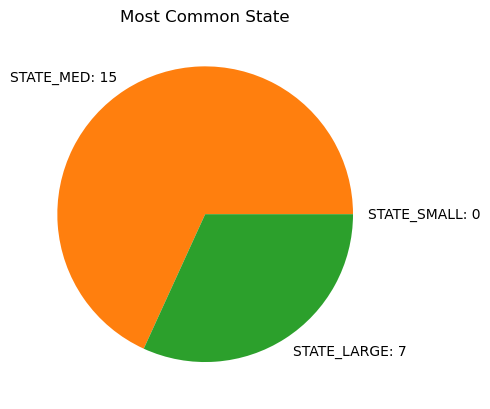

In [5]:
# same data with pie chart, add the number to the label text to another var to use as the labels var
labels = [f"{state}: {count}" for state, count in state_counts.items()]
plt.pie(state_counts.values(), labels=labels)
plt.title('Most Common State')
plt.savefig("AnalysisData/Graphs/Pie/PlaytestingAnalysis_102124_MostCommonState.png")
# plt.pie(state_counts.values(), labels=state_counts.keys())

In [6]:
# do the same for the respawn counts: there are 5 columns for respawn counts called "Respawns at C#" where # denotes a number from 1 to 5, 
# find the sum of the counts for each column and plot the data using a bar graph and a pie chart
# typecast the values into int and find the sum of the columns
# generate a bar graph and a pie plot
respawn_counts = {}
for i in range(1, 6):
    respawn_counts[f"C{i}"] = df.iloc[25:][f"Respawns at C{i}"].apply(int).sum()
respawn_counts

{'C1': 3, 'C2': 5, 'C3': 0, 'C4': 3, 'C5': 5}

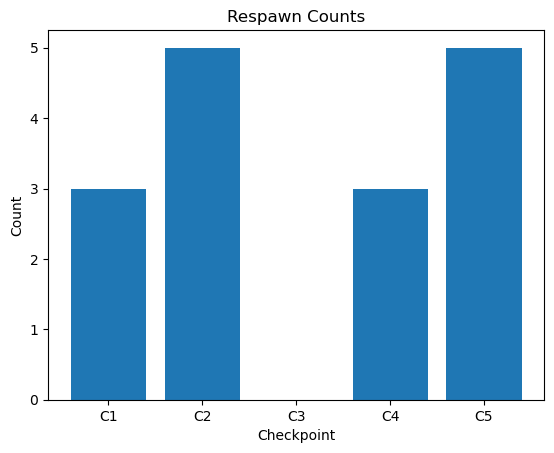

In [7]:
plt.bar(respawn_counts.keys(), respawn_counts.values())
plt.xlabel('Checkpoint')
plt.ylabel('Count')
plt.title('Respawn Counts')
plt.savefig("AnalysisData/Graphs/Bar/PlaytestingAnalysis_102124_RespawnCounts.png")

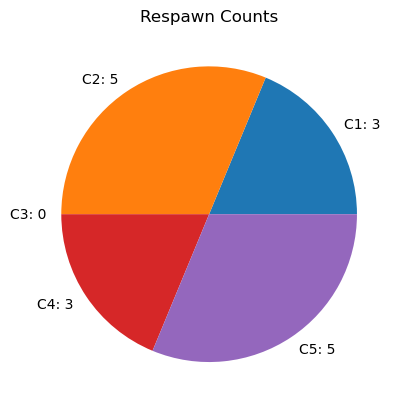

In [8]:
# pie chart with labels that include the count
labels = [f"{respawn}: {count}" for respawn, count in respawn_counts.items()]
plt.pie(respawn_counts.values(), labels=labels)
plt.title('Respawn Counts')
plt.savefig("AnalysisData/Graphs/Pie/PlaytestingAnalysis_102124_RespawnCounts.png")